<h1> Best Grades </h1>

<h2>Setting up the courses of interest</h2>

getting the course list from the catalog. the courses are split into core from which you must complete at least 2, and the rest of the courses.

In [17]:
import re

def find_6_digit_sequences(input_string):
    """
    Finds all unique 6-digit sequences in a given string.

    Args:
        input_string (str): The string to search for 6-digit sequences.

    Returns:
        list: A list of unique 6-digit sequences found in the input string.
    """
    # Define the regex pattern to match 6-digit sequences
    pattern = r'\b\d{6}\b'
    
    # Find all matches using findall() method
    sequences = re.findall(pattern, input_string)
    
    return sequences

In [18]:
def clean_string(input_string):
    """
    Cleans a string by removing double quotes, single quotes, new lines, 
    carriage returns, and excessive spaces.

    Args:
        input_string (str): The string to be cleaned.

    Returns:
        str: The cleaned string.
    """
    # Replace unwanted characters
    cleaned_string = input_string.replace('"', '').replace("'", '').replace('\n', ' ').replace('\r', ' ')
    
    # Remove leading and trailing whitespace
    cleaned_string = cleaned_string.strip()
    
    # Remove excessive spaces between words
    cleaned_string = ' '.join(cleaned_string.split())
    
    return cleaned_string

In [19]:
sig_core = ["336020","336023","336027","336208","336326","336502","336522","336533"]
sig_rest =["336325","336504","336521","336536","336538","336540","336544","336545","336546","336547","336549","336550","034033","044101","044198","044202","046195","046197","046200","046201","046211","046332","046745","046746","236523","236781"]
Mechanica = "336326 336506 336517 336522 336539 336541 336021 336520 336521 336540 336549 336550 034033 035001 035199 036049  036076  084225"
tissue = "336021 ננ - לויבב םיקיקלח ' יגולואירו הקינכמ 2 1 - 2.5 336402 ןכת ויב - םירמוח 2 1 - 2.5 336517 ויב - אתה לש הסדנה 2 1 - 2.5 336528 תופורת לש רקובמ רורחש 2 1 - 2.5 336529 םייגולויב םיפילחתו תומקר תסדנה 2 1 - 2.5 336326 םירטמרפ ךורעשו םינותנ חותינ 2 1 - 2.5 336404 םיינורטקלאויב םיקשממ 2 1 - 2.5 336405 כטויבבו היגולויבב םייסדנה תודוסי 'נ 2 1 - 2.5 336520 המקר יפילחתו םיידפוטרוא םילתש 2 1 - 2.5 336521 וידרקה 'עמ לש םייסדנה תונורקע 3 1 - 3.5 336538 ויב תונורקע - תולוקלומ תשיחל םייסדנה 2 1 - 2.5 336544 םייטנג םילגעמ 2 1 - 2.5 336548 ןכתל הדבעמ םייטנג םילגעמ - - 4 2.0 336549 ףוציר תוקינכט DNA 2 2 - 3.0 336550 תיבושיח הקיזיפויב 2 1 - 2.5 054413 היגולונכטויבב םהימושיו םירמילופ 2 1 - 2.5 134020 תיללכ הקיטנג 3 1 - 3.5 134069 תוחתפתהה לש היגולויב 2 1 - 2.5 134082 תירלוקלומ היגולויב 2 1 - 2.5 134119 יטנגה יוטיבה תרקב 2 1 - 2.5 134121 היגולוריוו היגולויבורקימ 3 - - 3.0 276413"
hova_2023 = "044102 למשח תודבעמב תוחיטב 4 - - 0.0 104065 הרבגלא 1מ2 4 2 - 5.0 104042 ודח 1מ2 4 2 - 5.0 114071 הקיזיפ 1 'מ 3 1 - 3.5 125001  הימיכ תיללכ 2 2 - 3.0 134058 104013 אודח 2ת 4 3 - 5.5 104038 הרבגלא 2מ 2 1 - 2.5 104136 רדמ  3 2 - 4.0 114052 הקיזיפ 2 3 1 - 3.5 124801 תינגרוא הימיכ 1 ב 2 1 - 2.5 234128 044105 םיילמשחה םילגעמה תרות 3 2 - 4.0 104214 הירופ ירוט 2 1 - 2.5 104215 תובכורמ תויצקנופ 2 1 - 2.5 104220 דמ 2 1 - 2.5 124503 תילקיזיפ הימיכ 1ב 2 1 - 2.5 134019 היגולומיזנאו הימיכויבל אובמ 2 1 - 2.5 334274 044131 תוכרעמו תותוא 4 2 - 5.0 104034 ח תורבתסהל אובמ 3 3 - 3.5 334221 לש תודוסי םירמוח םייאופר 2 1 - 2.5 334222 םיקצומ תקינכמ ויב הסדנהל - תיאופר 3 2 - 4.0 336537 134113 םיילובטמ םילולסמ 3 1 - 3.5 276011 םיסדנהמל ףוגה תוכרעמ לש היגולויזיפ 3 1 - 3.5 334009 םייגולויב םימרוז תקינכמ 3 2 - 4.0 334011 ויב ןכת תודוסי - ילמשח 3 2 - 4.0 335010 יסיסב ינכמויב ןכת 2 2 - 3.0 336022 334023 הקיטסיטטסל אובמ 3 1 - 3.5 335001 334014 ויב הסדנהב טקיורפ - תיאופר 1 - - 9 4.0 335002 335015 ויב הסדנהב טקיורפ - תיאופר 2 - - 9 3.0 335003"
hova_2022 = "104016 104042 114071 125001 כימיה כללית 2 2 - 3.0 134058 ביולוגיה 1 3 - - 3.0 זה מומלץ להרשם ל קורס334021 ) 1.0 נקכבחירה חופשית . מק רס 104042 ח2 יוכר גם 104018 א 1מ.סמ 104013 4 3 - 5. 104038 אלג2 1 - 2.5 104136מ3 2 - 4.0 114052 פיזיקה 2 3 1 - 3.5 124801 כימיה אורג1 - 2.5 234128 מבוא למחשב שפת פייתון 2 2 2 4.0 044105 תורת המעגלים החשמליים 3 2 - 4.0 104214 טורי פוריה 2 1 - 2.5 104215 פונקציות מרוכבות2 1 - 2.5 104220 מ 2 1 - 2.5 124503 כימיה פיזיקלית 2 1 - 2.5 134019 מבוא לביוכימיה ואנזימולוגיה 2 1 - 2.5 324033 אנגלית טכנית מתקדמים  3 - - 3.0 334274 מבוא לאנטומיה של האדם 2 - - 2.0 044131 אותות ומערכות 4 2 - 5.0 104034 מבוא להסתברות 3 3 - 3.5 334221 יסודות של חומרים רפואיים 2 1 - 2.5 334222 מכניקת מוצקים להנדסה ביו -רפואית 3 2 - 4.0 336537 ביופיזיקה ונוירופיזיולוגיה למהנדסים 2 2 - 3.0 134113 מסלולים מטבוליים 3 1 - 3.5 276011 פיזיולוגיה של מערכות הגוף למהנדסים 3 1 - 3.5 334009 מכניקת זורמים ביולוגיים 3 2 - 4.0 334011 יסודות תכן ביו - חשמלי 3 2 - 4.0 335010 תכן ביומכני בסיסי 2 2 - 3.0 336022 מתא לרקמה 2 1 - 2.5 334023 מבוא לסטטיסטיקה 3 1 - 3.5 335001 מעבדה בהנדסה ביו - רפואית 1 - - 4 2.0 334014 פרויקט בהנדסה ביו -רפואית 1 - - 9 4.0 335002 מעבדה בהנדסה ביו - רפואית 2 - - 4 2.0 335015 פרויקט בהנדסה ביו -רפואית 2 - - 9 3.0 335003"
hova_2021 = "104016 104018 114071 125001 134058 104013 104135 114052 124801 234128 044105 104221 104223 134019 334274 044131 104034 336537 334221 335009 334222 134113 276011 334011 336022 336533 334023 335001 335010 334014 335002 335015 335003"
#this one i'm going to split with "clean string" function. and stop manually sorting the data
hova_2020 = """ס 1 'ה 'ת 'מ 'קנ
044102 למשח תודבעמב תוחיטב 4 - - 0.0
104016 הרבגלא 1 'מ 4 2 - 5.0
104018 א"ודח 1 'מ 4 2 - 5.0
114071 הקיזיפ 1 'מ 3 1 - 3.5
125001 הימיכ תיללכ 2 2 - 3.0
134058 היגולויב 1 3 - - 3.0
394800 ינפוג ךוניח - 2 - 1.0
20.5
הל הבוח * י תויחנהל םאתהב ,רטסמסה ךלהמב ונתני תואצרהה .הז עוצקמל םשר
.דרפנב ומסרופיש
 "תומגמ" סרוק תחקל ץלמומ הז רטסמסב 334021 (1.0 תישפוח הריחבכ )'קנ .
 רטסמס 2 'ה 'ת 'מ 'קנ
104013 א"ודח 2ת' 4 3 - 5.5
104135 'ת ר"דמ 2 1 - 2.5
114052 הקיזיפ 2 3 1 - 3.5
124801* תינגרוא הימיכ 1 'ב 2 1 - 2.5
234128 תפש בשחמל אובמ ןותייפ 2 2 2 4.0
324033 תינכט תילגנא 'ב םימדקתמ 3 - - 3.0
21.0
 רטסמס 3 'ה 'ת 'מ 'קנ
044105 םילגעמה תרות םיילמשחה 3 2 - 4.0
104221 תובכורמ תויצקנופ 'לרגטניא תורמתהו 3 2 - 4.0
104223 ו ח"דמ רופ ירוט י הי 3 2 - 4.0
124503 תילקיזיפ הימיכ 1 'ב 2 1 - 2.5
134019 היגולומיזנאו הימיכויבל אובמ 2 1 - 2.5
274001 רקימ הימוטנאל אובמ ו ורקאמו ' ' 2 - - 2.0
394800 ךוניח ינפוג - 2 - 1.0
20.0
 רטסמס 4 'ה 'ת 'מ 'קנ
044131 תוכרעמו תותוא 4 2 - 5.0
104034 'ח תורבתסהל אובמ 3 3 - 3.5
336537 םיסדנהמל היגולויזיפוריונו הקיזיפויב 2 2 - 3.0
334221 לש תודוסי םירמוח םייאופר 2 1 - 2.5
335009 תקינכמ םייגולויב םימרוז 2 2 - 3.0
334222 הקינכמויבה תודוסי 3 2 - 4.0
21.0
 "הישעתה םע םישגפמ" סרוקה תא דומלל ץלמומ הז רטסמסב 334331 (1.0 )'קנ
.תיטלוקפ הריחב תרגסמב
 רטסמס 5 'ה 'ת 'מ 'קנ
134113 םיילובטמ םילולסמ 3 1 - 3.5
 ףוגה תוכרעמ לש היגולויזיפ 3 1 - 3.5
םיסדנהמל
276011
334011 ויב ןכת תודוסי - ילמשח 3 2 - 4.0
336022 המקרל אתמ 2 1 - 2.5
336533 הקינוטופו הקיטפוא תודוסי 2 2 - 3.0
337403 תויגולויזיפ תוכרעמב רבעמ תועפות 2 2 - 3.0
19.5
 רטסמס 6 'ה 'ת 'מ 'קנ
335001 ויב הסדנהב הדבעמ - תיאופר 1 - - 4 2.0
335010 יסיסב ינכמויב ןכת 2 2 - 3.0
335016 ינילק טקיורפ - יסדנה 1 - 2 1.5
הריחב יסרוק םייטלוקפ
094423 הקיטסיטטסל אובמ - - - 3.5
10.0
 רטסמס 7 'ה 'ת 'מ 'קנ
334014@ ויב הסדנהב טקיורפ - תיאופר 1 - - 9 4.0
הריחב יסרוק םייטלוקפ
4.0
 תונשדח :ימזיה סרוקה תא דומלל ןתינ ,טקיורפ סרוק םוקמב , 'ד הנשב @
 ןייזידויב לדומב תיאופר 1+2 336024 , 336025 (6.0 )'קנ
 ץלמומ הז רטסמסב ״םיינכדע םירקחמ״ סרוק תחקל 336026 (1.0 הריחבב )'קנ
תישפוח .
 רטסמס 8 'ה 'ת 'מ 'קנ
335015 ויב הסדנהב טקיורפ - תיאופר 2 - - 9 3.0"""
hova_2019 = "044102 בטיחות במעבדות חשמל 4 - - 0.0 104016 אלגברה 1 מ 4 2 - 5.0 104018 חדוא 1מ 4 2 - 5.0 114071 פיזיקה 1מ 3 1 - 3.5 125001 כימיה כללית 2 2 - 3.0 134058 ביולוגיה 1 3 - - 3.0 394800 חינוך גופני - 2 - 1.0 20.5 * חובה להרשם למקצוע זה. ההרצאות ינתנו במהלך הסמסטר, בהתאם להנחיות שיפורסמו בנפרד. בסמסטר זה מומלץ לקחת קורס מגמות 334021 )1.0 נק( כבחירה חופשית. סמסטר 2 ה ת מ נק 104013 חדוא 2ת 4 3 - 5.5 104135 מדר ת 2 1 - 2.5 114052 פיזיקה 2 3 1 - 3.5 124801* כימיה אורגנית 1 ב 2 1 - 2.5 234128 מבוא למחשב שפת פייתון 2 2 2 4.0 324033 אנגלית טכנית מתקדמים ב 3 - - 3.0 21.0 סמסטר 3 ה ת מ נק 044105 תורת המעגלים החשמליים 3 2 - 4.0 104221 פונקציות מרוכבות והתמרות אינטגרל 3 2 - 4.0 104223 מדח וטורי פורייה 3 2 - 4.0 124503 כימיה פיזיקלית 1 ב 2 1 - 2.5 134019 מבוא לביוכימיה ואנזימולוגיה 2 1 - 2.5 274001 מבוא לאנטומיה מיקרו ומאקרו 2 - - 2.0 394800 חינוך גופני - 2 - 1.0 20.0 סמסטר 4 ה ת מ נק 044131 אותות ומערכות 4 2 - 5.0 104034 מבוא להסתברות ח 3 3 - 3.5 336537 ביופיזיקה ונוירופיזיולוגיה למהנדסים 2 2 - 3.0 334221 יסודות של חומרים רפואיים 2 1 - 2.5 335009 מכניקת זורמים ביולוגיים 2 2 - 3.0 334222 יסודות הביומכניקה 3 2 - 4.0 21.0 בסמסטר זה מומלץ ללמוד את הקורס מפגשים עם התעשיה 334331 )1.0 נק( במסגרת בחירה פקולטית. סמסטר 5 ה ת מ נק 134113 מסלולים מטבוליים 3 1 - 3.5 פיזיולוגיה של מערכות הגוף 3 1 - 3.5 למהנדסים 276011 334022 יסודות תכן ביו-חשמלי 3 1 - 3.5 336022 מתא לרקמה 2 1 - 2.5 336533 יסודות אופטיקה ופוטוניקה 2 2 - 3.0 337403 תופעות מעבר במערכות פיזיולוגיות 2 2 - 3.0 19.0 סמסטר 6 ה ת מ נק 335001 מעבדה בהנדסה ביו-רפואית 1 - - 4 2.0 335010 תכן ביומכני בסיסי 2 2 - 3.0 335016 פרויקט קליני-הנדסי 1 - 2 1.5 קורסי בחירה פקולטיים 6.5 בסמסטר זה מומלץ ללמוד את הקורס 094423 מבוא לסטטיסטיקה )3.5 נק( הנחוץ בבחירה הפקולטית. סמסטר 7 ה ת מ נק 334014 פרויקט בהנדסה ביו-רפואית 1 - - 9 4.0 335002 מעבדה בהנדסה ביו-רפואית 2 - - 4 2.0 קורסי בחירה פקולטיים 6.0 סמסטר 8 ה ת מ נק 335003 מעבדה בהנדסה ביו-רפואית 3 - - 4 2.0 335015 פרויקט בהנדסה ביו-רפוא"
hova_2018 = "סמסטר 1 ה ת מ נק 044102 * בטיחות במעבדות חשמל 4 - - 0.0 104016 אלגברה 1 מ 4 2 - 5.0 104018 חדוא 1מ 4 2 - 5.0 114071 פיזיקה 1מ 3 1 - 3.5 125001 כימיה כללית 2 2 - 3.0 134058 ביולוגיה 1 3 - - 3.0 394800 חינוך גופני - 2 - 1.0 20.5 * חובה להרשם למקצוע זה. ההרצאות ינתנו במהלך הסמסטר, בהתאם להנחיות שיפורסמו בנפרד. בסמסטר זה מומלץ לקחת קורס מגמות 334021 )1.0 נק( כבחירה חופשית. סמסטר 2 ה ת מ נק 104013 חדוא 2ת 4 3 - 5.5 104135 מדר ת 2 1 - 2.5 114052 פיזיקה 2 3 1 - 3.5 124801* כימיה אורגנית 1 ב 2 1 - 2.5 234112 מבוא למחשב שפת C 2 2 2 4.0 324033 אנגלית טכנית מתקדמים ב 3 - - 3.0 21.0 *ניתן ללמוד 125801 כימיה אורגנית )5.0 נק( הנחוץ כקדם בחלק מקורסי ביולוגיה המופיעים כבחירה פקולטית במגמת הנדסת רקמות וביו-חומרים. הנקודות העודפות יחשבו כבחירה חופשית. סמסטר 3 ה ת מ נק 044105 תורת המעגלים החשמליים 3 2 - 4.0 104221 פונקציות מרוכבות והתמרות אינטגרל 3 2 - 4.0 104223 מדח וטורי פורייה 3 2 - 4.0 124503 כימיה פיזיקלית 1 ב 2 1 - 2.5 134019 מבוא לביוכימיה ואנזימולוגיה 2 1 - 2.5 274001 מבוא לאנטומיה מיקרו ומאקרו 2 - - 2.0 394800 חינוך גופני - 2 - 1.0 20.0 סמסטר 4 ה ת מ נק 044131 אותות ומערכות 4 2 - 5.0 104034 מבוא להסתברות ח 3 3 - 3.5 336537 ביופיזיקה ונוירופיזיולוגיה למהנדסים 2 2 - 3.0 334221 יסודות של חומרים רפואיים 2 1 - 2.5 335009 מכניקת זורמים ביולוגיים 2 2 - 3.0 334222 יסודות הביומכניקה 3 2 - 4.0 21.0 בסמסטר זה מומלץ ללמוד את הקורס מפגשים עם התעשיה 334331 )1.0 נק( במסגרת בחירה פקולטית. סמסטר 5 ה ת מ נק 134113 מסלולים מטבוליים 3 1 - 3.5 פיזיולוגיה של מערכות הגוף 3 1 - 3.5 למהנדסים 276011 334022 יסודות תכן ביו-חשמלי 3 1 - 3.5 336022 מתא לרקמה 2 1 - 2.5 336533 יסודות אופטיקה ופוטוניקה 2 2 - 3.0 337403 תופעות מעבר במערכות פיזיולוגיות 2 2 - 3.0 19.0 סמסטר 6 ה ת מ נק 335001 מעבדה בהנדסה ביו-רפואית 1 - - 4 2.0 335010 תכן ביומכני בסיסי 2 2 - 3.0 335016 פרויקט קליני-הנדסי 1 - 2 1.5 קורסי בחירה פקולטיים 6.5 בסמסטר זה מומלץ ללמוד את הקורס 094423 מבוא לסטטיסטיקה )3.5 נק( הנחוץ בבחירה הפקולטית. סמסטר 7 ה ת מ נק 334014 פרויקט בהנדסה ביו-רפואית 1 - - 9 4.0 335002 מעבדה בהנדסה ביו-רפואית 2 - - 4 2.0 קורסי בחירה פקולטיים 6.0 סמסטר 8 ה ת מ נק 335003 מעבדה בהנדסה ביו-רפואית 3 - - 4 2.0 335015 פ"
refua2021 = "2 למשח תודבעמב תוחיטב 4 - - 0.0 104016 הרבגלא 1מ 4 2 - 5.0 104018 אודח 1 מ 4 2 - 5.0 114071 הקיזיפ 1 מ 3 1 - 3.5 124120 הימיכה תודוסי 4 2 - - 5.0 274109 104013 אח 2  4 3 - 5.5 104135 114052 הקיזיפ 2 3 1 - 3.5 234128 ןותייפ תפש בשחמל אובמ 2 2 2 4.0 125802 תינגרוא הימ4 2 - - 5.0 274167 044105 םיילמשחה םילגעמה תרות 3 2 - 4.0 104221 104223 היירופ ירוטו.0 124503 תילקיזיפ הימיכ 1 - 2.5 324033 תינכט תילגנא- - 3.0 274241 *תיללכ הימיכויב 4 1 - - 4.5 274258 044131 תוכרעמו תותוא 4 2 - 5.0 104034 334221 334222 335009 תקינכמ םייגולויב םימרוז 2 2 - 3.0 274165 *תיללכ הקיטנג 3 1 - 3 3.5 274253  334011 ויב ןכת תודוסי - ילמשח 3 2 - 4.0 336022 המקרל אתמ 2 1 - 2.5 337403 תויגולויזפ תוכרעמב רבעמ תועפות 2 2 - 3.0 274142 ינילק ישילש – ( אפור תויהל 1) - - 6 - 2.0 274242 םדאה לש הקיטנג 2 - - - 2.0 274243 274259 5.0 274260  334023 הקיטסיטטסל אובמ 3 1 - 3.5 335001 הדבעמ ויב הסדנהב - תיאופר 1 - - 4 2.0 335010 יסיסב ינכמויב ןכת 2 2 - 3.0 274143 ינילק ישילש – תויהל ( אפור 2) - - 6 - 2.0 274237 תינילק הימיכויבב הדבעמ - 1 2 4 1.0 274262 היגולוירבמא 3 1 - 3 3.5 274263 5.0 276310  014 ויב הסדנהב טקיורפ - תיאופר 1 - - 9 4.0 335003 ויב הסדנהב הדבעמ - תיאופר 3 - - 6 2.0 336533 הקינוטופו הקיטפוא תודוסי 2 2 - 3.0 274255 ק ישילש יניל – ( אפור תויהל 3) - - 6 - 2.0 274323 היגולויזיפ 1 4 1 1 4 4.5 274348  335015 רפ ויב הסדנהב טקיו - תיאופר 2 - - 9 3.0  274246 ןטרסל ירלוקלומה סיסבה 2 - - - 2.0 274256 ינילק ישילש – ( אפור תויהל 4) - - 6 - 2.0 274261 274247 היגולוריו 2.5 - - - 2.5 274252 םיטוירקואא םינגותפ 2 - - - 2.0היגול 274328 274336 תיתכרעמ היגולויזיפוריונ 3 - - 1 3.0 274361 הימוטנאוריונ 2 - 2 - 2.5 274370 ינילק ישילש – ( אפור תויהל 5) - - 6 - 2.0 274372 74251 היצולובא 2 - - - 2.0 274318 היגולוימדיפא 2 - - 2 2.0 274320 טפשמו הקיתא 2 - - 2 2.0 274352 תינילק הנוזת 2 - - 3 2.0 274367 תיסיסב היגולוקמרפ 3 2 - 1 4.0 274368 תיללכ היגולותפ 4 - 3 6 5.0 274369 היגולוטמה 3 - - 6 3.0 274371"
biofood_hova_2023 = "104003 104019 124120 064522 134058 104004 324033 125801 125101 134019 114051 104131 234128 124510 064523 064212 134113 104228 2 2 4 3.0064322 064325 064115 064419 064413 114052 064117 064507 064106 064420 064324 064326 64118 064250 094481 064615  064239 םמ 1 - 5 4 2.5 064509 "
refua2019 = "סמסטר 1 הנדסה ביו-רפואית 044102 * בטיחות במעבדות חשמל* 4 - - 0.0 104016 אלגברה 1מ 4 2 - 5.0 104018 חד 1מ 4 2 - 5.0 114071 פיזיקה 1 מ 3 1 - 3.5 124120 יסודות הכימיה 4 2 - - 5.0 394800 חינוך גופני - 2 - 1.0 ברפואה 274109 מבוא לרפואה דחופה** 1 - 3 - 2.0 21.5 *חובה להרשם למקצוע זה. ההרצאות ינתנו במהלך הסמסטר בהתאם להנחיות שיפורסמו בנפרד. ** קורס זה ינתן כהוראה מרוכזת בקיץ במידה שלא ניתן יהיה לשלבו במערכת סמסטר 2 ה ת מ עב נק בהנדסה ביו-רפואית 104013 חדו 2ת 4 3 - 5.5 104135 מדר ת 2 1 - 2.5 114052 פיזיקה 2 3 1 - 3.5 234128 מבוא למחשב שפת פייתון 2 2 2 4.0 ברפואה 125802 כימיה אורגנית רמ* 4 2 - - 5.0 274167 ביולוגיה של התא 3 1 - 3 3.5 24.0 *למשלימי התכנית לתואר כפול בלבד, יוכר גם הקורס כימיה אורגנית 125801 5.0 נק סמסטר 3 ה ת מ ע בהנדסה ביו-רפואית 044105 תורת המעגלים החשמליים 3 2 - 4.0 פונקציות מרוכבות והתמרות 3 2 - 4.0 אינטג 104221 104223 מדח וטורי פורייה 3 2 - 4.0 124503 כימיה פיזיקלית 1ב 2 1 - 2.5 324033 אנגלית טכנית מתקדמים ב 4 - - 3.0 394800 חינוך גופני - 2 - 1.0 ברפואה 274241 ביוכימיה כללית* 4 1 - - 4.5 274258 מבוא לפסיכולוגיה רפואית 2 - - 2 2.0 25.0 *למשלימי התכנית לתואר כפול בלבד, יוכר גם הקורס מבוא לביוכימיה ואנזימולוגיה 134019 2.5 נק סמסטר 4 ה ת מבהנדסה ביו-רפואית 044131 אותות ומערכות 4 2 - 5.0 104034 מבוא להסתברו3 3 - 3.5 335009 מכניקת זורמים ביולוגיים 2 2 - 3.0 334221 יסודות של חומרים רפואיים 2 1 - 2.5 334222 יסודות הביומכניקה 3 2 - 4.0 ברפואה 274165 גנטיקה כללית* 3 1 - 3 3.5 274253 פיזיולוגיה תאית** 3 2 - - 4.0 25.5 *למשלימי התכנית לתואר כפול בלבד, יוכר גם הקורס גנטיקה כללית 134020 3.5 נמשלימי התכנית לתואר כפול בלבד, יוכר גם הקורס ביופיזיקה ונוירופיזיולוגיה 336537 3.0 נקבמסטר זה מומלץ לקחת את הקורפגשים עם התעשי 334331 )1.0 נק( במסגרת בחירה פקולטית בהנדסה ביו-רפואית סמסטר 5 ע בהנדסה ביו-רפואית 334022 יסודות תכן ביו-חשמלי 3 1 - 3.5 336022 מתא לרקמה 2 1 - 2.5 337403 תופעות מעבר במערכות פזיולוגיות 2 2 - 3.0 ברפואה 274142 שלישי קליני– להיות רופא )1( - - 6 - 2.0 274242 גנטיקה של האדם 2- - - 2.0 ביולוגיה מולקולרית ומנגנוני בקרה 3 - - - 3.0 מולקולריים 274243 274259 אנטומיה 4 - 3 4 5.0 274260 היסטולוגיה 2 - 3 4 3.0 24.0 סמסטר 6  בהנדסה ביו-רפואית 094423 מבוא לסטטיסטיקה 3 1 - 3.5 335001 מעבדה בהנדסה ביו-רפואית 1 - - 4 2.0 335010 תכן ביומכני בסיסי 2 2 - 3.0 קורסי בחירה בהנדסה ביו- 2.0 רפואית# ברפואה 274143 שלישי קליני – להיות רופא )2( - - 6 - 2.0 274237 מעבדה בביוכימיה קלינית - 1 2 4 1.0 274262 אמבריולוגיה 3 1 - 3 3.5 274263 אנטומיה ב4 - 3 4 5.0 276310 ביוכימיה קלינית 4 - - - 4.0 26.0 סמסטר נדסה ביו-רפואית 334014 פרויקט בהנדסה ביו-רפואית 1 - - 9 4.0 335002 מעבדה בהנדסה ביו-רפואית 2 - - 4 2.0 336533 יסודות אופטיקה ופוטוניקה 2 2 - 3.0 קורסי בחירה בהנדסה ביו-רפואית# 5.0 ברפואה 274255 שלישי קליני – להיות רופא )3( - - 6 - 2.0 274323 פיזיולוגיה 1 4 1 1 4 4.5 274348 פיזיולוגיה 2 3 1 1 4 4.0 24.5 הנדסה ביו-רפואית 33 / תוכנית לימודים תשף 2019/2020 287 סמסטר 8  בהנדסה ביו-רפואית 335003 מעבדה בהנדסה ביו-רפואית 3 - - 4 2.0 335015 פרויקט בהנדסה ביו-רפואית 2 - - 9 3.0 קורסי בחירה בהנדסה ביו- 10.0 רפואית# ברפואה 274246 2 - - - הבסיס המולקולרי לסרטן 2.0 274256 שלישי קליני – להיות רופא )4( - - 6 - 2.0 274261 אימונולוגיה בסיסית וקלינית 4 - - - 4.0 23.0 סמסטר 9 מפואה 274247 וירולוגיה 2.5 - - - 2.5 274252 פתוגנים אאוקריוטים 2 - - - 2.0 אנדוקרינולוגיה-פיזיולוגיה 3 - - - 3.0 ופתופיזיולוגיה 274328 274336 נוירופיזיולוגיה מערכתית 3 - - 1 3.0 274361 נוירואנטומיה 2 - 2 - 2.5 274370 שלישי קליני – להיות רופא )5( - - 6 - 2.0 274372 בקטריולוגיה 4 - 2 3 4.5 קורסי בחירה רפואה 2.0 21.5 סמסטר 10ברפואה 274251 אבולוציה 2 - - - 2.0 274318 אפידמיולוגיה 2 - - 2 2.0 274320 אתיקה ומשפט 2 - - 2 2.0 274352 תזונה קלינית 2 - - 3 2.0 274367 פרמקולוגיה בסיסית 3 2 - 1 4.0 274368 פתולוגיה כללית 4 - 3 6 5.0 274369 המטולוגיה 3 - - 6 3.0 274371 שלישי קליני – 2"


In [20]:
#Helps to know what changed each year
def compare_lists(list1, list2):
    differences = {
        "only_in_list1": [item for item in list1 if item not in list2],
        "only_in_list2": [item for item in list2 if item not in list1],
        "in_both": [item for item in list1 if item in list2]
    }
    return differences

hova2018 = find_6_digit_sequences(hova_2018)
hova2019 = find_6_digit_sequences(hova_2019)
hova2020 = find_6_digit_sequences(hova_2020)
hova2021 = find_6_digit_sequences(hova_2021)
hova2022 = find_6_digit_sequences(hova_2022)
hova2023 = find_6_digit_sequences(hova_2023)

#compare_lists(hova2019, hova2023)

In [21]:
#splitting into mandetory and electives - Biomechanics
mech = find_6_digit_sequences(Mechanica)
mech_core = mech[:6]
mech_rest = mech[6:]

In [22]:
#splitting into mandetory and electives - Biomechanics
rekamot = find_6_digit_sequences(tissue)
tissue_core = rekamot[:5]
tissue_rest = rekamot[5:]

In [23]:
#looking up the neighbors grass seeing if it's greener
hashmal_2019 = """סמסטר 1 ה' ת' מ' נק'
044102 בטיחות במעבדות חשמל 4** - - -
104031 אינפי 1מ' 4 3 - 5.5 104016 אלגברה 1מ' 4 2 - 5.0 114071 פיזיקה 1מ'* 3 1 - 3.5 234117 מבוא למדעי המחשב ח' 2 2 2 4.0 324033 אנגלית טכנית-מתקדמים ב' 4 - - 3.0 394901 חינוך גופני - 2 - 1.0 22.0 - 10 17: *מומלץ לסטודנט שחייב ב"השלמות פיזיקה" לא לקחת יותר מ- 11
+מקצוע בחירה פקולטי מומלץ: "פרויקט מבוא בהנדסת חשמל"
.)045001(
הצטיינות בלימודים מוגדרת ע"ס ממוצע ומינימום 18 נק' צבירה.
סמסטר 2 ה' ת' מ' נק'
044252 מערכות ספרתיות ומבנה המחשב 4 2 - 5.0
104013 חדו"א 2 ת' 4 3 - 5.5
104035 מד"ר ואינפי 2ח' 4 2 - 5.0
114032 מעבדה לפיזיקה 1ח'* - - 2 1.0
114075 פיזיקה 2ממ' 4 2 - 5.0
394901 חינוך גופני - 2 - 1.0
22.5 2 11 16
*סטודנט הרוצה בכך, יוכל לקחת את המקצוע "מעבדה פיסיקלית 1"
)114081( בהיקף 1.5 נק'. חצי הנקודה הנוספת תזקף לבחירה חופשית.
+מקצוע בחירה פקולטי מומלץ: "פרויקט מבוא בהנדסת חשמל"
.)045001(
סמסטר 3 ה ת מ פ נק'
044105 תורת המעגלים החשמליים 3 2 - - 4.0
044268 מבוא למבני נתונים ואלגוריתמים 2 1 - - 3.0
044157 מעב. בהנדסת חשמל 1א - - 3 3 2.0
104221 פונק. מרוכבות והתמרות אינטגרליות 3 2 - - 4.0
104223 משוואות דיפ. חלקיות וטורי פוריה 3 2 - - 4.0
114073 פיזיקה 3 ח' 3 1 - - 3.5
20.5 3 3 8 14
סמסטר 4 ה' ת' מ' נק'
044127 יסודות התקני מוליכים למחצה 3 1 - 3.5
044131 אותות ומערכות 4 2 - 5.0
044140 שדות אלקטרומגנטיים 2 2 - 3.5
104034 מבוא להסתברות ח' 3 1 - 3.5
15.5 - 5 12
סמסטר 5 ה ת מ פ נק'
044137 מעגלים אלקטרוניים 4 2 - - 5.0
044148 גלים ומערכות מפולגות 2 1 - - 3.0
044202 אותות אקראיים 2 1 - - 3.0
044158 מעבדה בהנדסת חשמל 1ב - - 2.5 2 1.5
044124 אלקטרוניקה פיסיקלית 2 2 - - 3.0
15.5 2 2.5 6 8
ניתן להוסיף מקצועות בחירה פקולטיים לפי בחירת הסטודנט.
הנדסת חשמל 04 / תוכנית לימודים תש"ף 2019/2020
105
סמסטר 6 ה ת מ נק'
044159 מעבדה בהנדסת חשמל 2 - - 4 2.5
044167 פרויקט א' - - 4 4.0
6.5 8 - -
סמסטר 7 נק' ה ת מ נק'
044166 מעבדה בהנדסת חשמל 3 - - 4 2.5
044169 פרויקט ב' - - 4 4.0
6.5 """

This code goes through the list of courses and extract all the stats from Cheesfork's GitHub while showing a progress bar - got to be patient

In [42]:
import requests
from tqdm import tqdm
from time import sleep
import csv

def get_finals_statistics(course_numbers, access_token):
    """
    Fetches the finals statistics for the given course numbers from GitHub.

    Args:
        course_numbers (list of str): List of course numbers to fetch statistics for.
        access_token (str): GitHub access token for authentication.

    Returns:
        dict: A dictionary containing the statistics for each course.
    """
    base_url = "https://api.github.com/repos/michael-maltsev/technion-histograms/contents/"
    headers = {'Authorization': f'token {access_token}'}
    all_statistics = {}

    for course_number in tqdm(course_numbers):
        course_url = f"{base_url}{course_number}?ref=main"
        try:
            response = requests.get(course_url, headers=headers)
            response.raise_for_status()
            contents = response.json()

            course_data = {'folders': {}}

            for item in contents:
                if item['type'] == 'dir':
                    folder_name = item['name']
                    finals_json_url = f"https://raw.githubusercontent.com/michael-maltsev/technion-histograms/main/{course_number}/{folder_name}/Finals.json"
                    finals_response = requests.head(finals_json_url)
                    if finals_response.status_code == 200:
                        finals_data = requests.get(finals_json_url).json()
                        course_data['folders'][folder_name] = {
                            'average': finals_data.get('average'),
                            'median': finals_data.get('median')
                        }

            all_statistics[course_number] = course_data
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for course {course_number}: {e}")
        sleep(0.2)
    return all_statistics

def write_to_csv(statistics):
    """
    Writes the finals statistics to a CSV file.

    Args:
        statistics (dict): The statistics data to write to the CSV.
        filename (str): The name of the CSV file to write to.
    """
    filename = input("Enter the filename to save the CSV: ")
    filename = filename + ".csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Course Number', 'Semester', 'Average', 'Median'])
        for course_number, data in statistics.items():
            for folder, stats in data['folders'].items():
                writer.writerow([course_number, folder, stats['average'], stats['median']])
        writer.writerow(['Course Number', 'Average of Medians'])
        #calculate average of medians to put at the end of the CSV
        average_medians = calculate_average_median(statistics)
        for course_number in average_medians:
            writer.writerow([course_number, average_medians[course_number]])
    print(f"Data has been written to {filename}")

def calculate_average_median(statistics):
    """
    Calculates the average of the median values for each course.

    Args:
        statistics (dict): The statistics data containing median values.

    Returns:
        dict: A dictionary with course numbers as keys and their average median values as values.
    """
    average_medians = {}
    for course_number, data in statistics.items():
        medians = []
        for folder in data['folders'].values():
            median_value = folder['median']
            if median_value is not None:
                try:
                    median_value = round(float(median_value), 2)  # Round to 2 decimal places
                    medians.append(median_value)
                except ValueError:
                    # Skip non-numeric median values silently
                    continue
        
        if medians:
            average_median = round(sum(medians) / len(medians), 2)  # Round to 2 decimal places
        else:
            average_median = None
        average_medians[course_number] = average_median

    return average_medians

Set up your personal access token from GitHub - this next code will test if it's valid. if not you'll be limited to get 60 courses per hour

In [38]:
import requests

access_token = ' '  # Replace with your actual access token

# Test the token validity by making a simple API request
test_url = "https://api.github.com/user"
test_response = requests.get(test_url, headers={'Authorization': f'token {access_token}'})

if test_response.status_code == 200:
    print("Token is valid.")
else:
    print(f"Invalid token. Status code: {test_response.status_code}")
    print(test_response.json())

Token is valid.


In [29]:
"""!pip install jupyternotify
%load_ext jupyternotify"""

SyntaxError: invalid syntax (2820745371.py, line 1)

In [43]:
%%notify

hova2019 = get_finals_statistics(hova2019,access_token)
hova2018 = get_finals_statistics(hova2018,access_token)
hova2021 = get_finals_statistics(hova2021,access_token)
hova2020 = get_finals_statistics(hova2020,access_token)
hova2022 = get_finals_statistics(hova2022,access_token)
hova2023 = get_finals_statistics(hova2023,access_token)

 95%|████████████████████████████████████████  | 41/43 [08:43<00:10,  5.45s/it]

Error fetching data for course 336026: 404 Client Error: Not Found for url: https://api.github.com/repos/michael-maltsev/technion-histograms/contents/336026?ref=main


100%|██████████████████████████████████████████| 36/36 [06:15<00:00, 10.43s/it]


<IPython.core.display.Javascript object>

In [ ]:
write_to_csv()

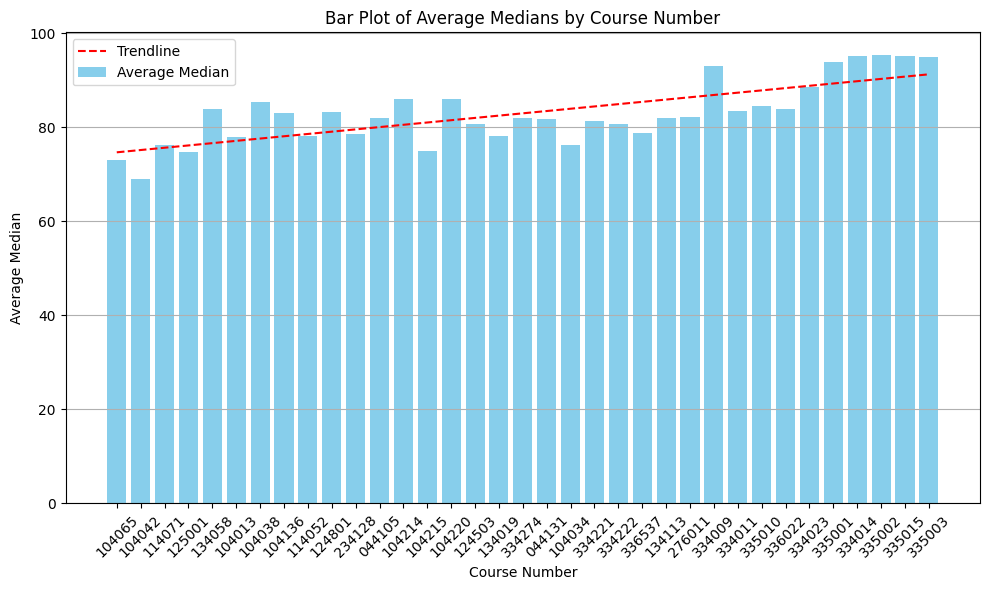

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart_with_trendline(average_medians):
    """
    Plots a bar chart of the average medians with a trendline.

    Args:
        average_medians (dict): A dictionary with course numbers as keys and their average median values as values.
    """
    # Filter out None values
    courses = [course for course, median in average_medians.items() if median is not None]
    medians = [median for median in average_medians.values() if median is not None]

    plt.figure(figsize=(10, 6))
    plt.bar(courses, medians, color='skyblue', label='Average Median')

    # Add trendline
    x = np.arange(len(courses))
    z = np.polyfit(x, medians, 1)
    p = np.poly1d(z)
    plt.plot(courses, p(x), "r--", label='Trendline')

    plt.title('Bar Plot of Average Medians by Course Number')
    plt.xlabel('Course Number')
    plt.ylabel('Average Median')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
# average_medians = {'course1': 75.32, 'course2': 85.12, 'course3': 90.45}
# plot_bar_chart_with_trendline(average_medians)

plot_bar_chart_with_trendline(calculate_average_median(hova2023))



WOW! we can see it does gets better in the degree's later years

In [72]:
main2018 = calculate_average_median(hova2018)
main2019 = calculate_average_median(hova2019)
main2020 = calculate_average_median(hova2020)
main2021 = calculate_average_median(hova2021)
main2022 = calculate_average_median(hova2022)
main2023 = calculate_average_median(hova2023)

In [87]:
def grade_list(dic):
    gradelst = []
    for i in dic.values():
        if i == None:
            continue
        else:
            gradelst.append(i)
    return gradelst

grade2018 = np.array(grade_list(main2018))
grade2019 = np.array(grade_list(main2019))
grade2020 = np.array(grade_list(main2020))
grade2021 = np.array(grade_list(main2021))
grade2022 = np.array(grade_list(main2022))
grade2023 = np.array(grade_list(main2023))

print(np.var(grade2018))
print(np.average(grade2018))

46.82281193749999
82.53075


In [88]:
print(np.var(grade2019))
print(np.average(grade2019))

45.34222971729125
82.795641025641


In [89]:
print(np.var(grade2020))
print(np.average(grade2020))

44.58588297172912
82.76205128205127


In [90]:
print(np.var(grade2021))
print(np.average(grade2021))

43.090539944903576
82.04545454545455


In [91]:
print(np.var(grade2022))
print(np.average(grade2022))

46.98364444444444
82.70333333333332


In [92]:
print(np.var(grade2023))
print(np.average(grade2023))

43.40518367346938
82.95857142857142


We can't conclude much from that stats, but we can debate about that :)